# Trace Estimator  
https://doi.org/10.1016/0377-0427(96)00018-0 
## b) Algorithm 1 with Gauss-Radau quadrature

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
#for part e)
from matrices import * 
import time 
from scipy.linalg import block_diag
from helpers import *
#to save the results in a pickle file
import os 
import pickle
import pandas as pd

In [ ]:
#the Poisson matrix
k=12
A= Poisson_function(k=k)
n=k**2
print("n=",n)
u = np.zeros(n)
u[4] = 1
u = np.random.randn(n)
def f(x):
    return 1/x
    
tol = 1e-5
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [U,L]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

In [ ]:
#the Pei matrix
n=120
A=Pei_function(alpha=5, n=n)
def f(x):
    return 1/x
#notice that in python Z=1/A outputs Z[i,j]=1/A[i,j] which isn't what we want but! With the way our algorithm is define
#and the way it makes computations it doesn't matter


u = np.zeros(n)
u[1] = 1
#u = np.random.randn(n)
tol = 1e-3
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [U,L]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

In [ ]:
n = 5
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

vec1 = -1*np.ones(n-1)
vec2 = 2*np.ones(n)
vec3 = -1*np.ones(n-1)
A = tridiag(vec1, vec2, vec3)

u = np.zeros(n)
u[1] = 1
# u = np.random.randn(n)
tol = 1e-2
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [L, U]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

## d) Algorithm 2 

In [ ]:
#the Poisson matrix
k=12
A= Poisson_function(k=k)
n=k**2
print("n=",n)
def f(x):
    return 1/x
tol = 1e-5
L = algorithm_2(A=A, m=50, p=0.9, function=f, epsilon=tol)

print("bounds [U,L]=", L)

I_ex=np.trace(np.linalg.inv(A))

print("exact value of trace of the inverse:", I_ex, 'found estimated value:', L[2], 'difference in two norm', np.linalg.norm(I_ex-L[2]))

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

In [ ]:
#the Pei matrix
n=120
A=Pei_function(alpha=5, n=n)

def f(x):
    return 1/x
tol = 1e-5
L = algorithm_2(A=A, m=50, p=0.9, function=f, epsilon=tol)

print("bounds [U,L]=", L)

I_ex=np.trace(np.linalg.inv(A))

print("exact value of trace of the inverse:", I_ex, 'found estimated value:', L[2], 'difference in two norm', np.linalg.norm(I_ex-L[2]))

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

## e) Numerical experiments | need to be run for different accuracies (that's what is asked)
so that's what I did, there's not much difference between the different accuracies, maybe when increasing matrix size we'll see a change

In [2]:
#--- I have set all the sizes so that they are our matrices final sizes. I have chosen st they are same as in the paper and
#if in the paper was paper the biggest size below that that fit in memory

#defining all the matrices at once

#heat_flow_matrix 
N=30 #hence has final size 900 as in the paper
nu=0.2 
heat_flow_matrix=heat_flow_function(nu,N)

# VFH matrix
VFH_matrix=-VFH_function(4) #hence has size 625 as in the paper

#Poisson matrix
poisson_matrix=Poisson_function(30) #hence has size 900 as in the paper

#Wathen matrix
nx=12
ny=12 #as in the paper
wathen_matrix=wathen_ge(nx, ny)
    
#Lehmer matrix
lehmer_matrix=Lehmer_function(200) #as in the paper

#Pei matrix
alpha=1
n=300 #as in the paper
pei_matrix=Pei_function(alpha, n)

In [3]:
#saved as pickle as csv didn't work
def get_pickle_file(tol=1e-5):

    path_to_file="numerical_experiment_"+str(tol)+".pk" #the pickle file of the result for a given tolerance tol

    if (os.path.exists(path_to_file)):
        print('exists') #print 'exists' if the csv with all values of the function 'running' have already been computed
        df = pd.read_pickle(path_to_file)
        #to complete
        running_time_array = df['running_time'].tolist()
        computed_value_array = df['computed_value'].tolist()
        
    else:
        print('no_exist')#print 'no_exist' if 'running' had to be run. Takes ?? min to complete.
        matrix_array=[heat_flow_matrix, VFH_matrix, poisson_matrix, wathen_matrix, lehmer_matrix, pei_matrix]
        matrix_names=['heat_flow_matrix', 'VFH_matrix', 'poisson_matrix', 'wathen_matrix', 'lehmer_matrix', 'pei_matrix']
    
        running_time_array=[]
        computed_value_array=[]
    
        for i in range(len(matrix_array)):
            print("running it for", matrix_array[i])
            array_1, array_2=numerical_experiments(matrix_array[i], tol)
            running_time_array.append(array_1)
            computed_value_array.append(array_2)
    
    #saving as a csv
    
        dict = {'running_time': running_time_array, 'computed_value': computed_value_array}
        df = pd.DataFrame(dict)
        # saving the dataframe to save future computation time
        df.to_pickle(path_to_file)
    return running_time_array, computed_value_array

### For tolerance=1e-8

no_exist
running it for [[ 1.8 -0.2  0.  ...  0.   0.   0. ]
 [-0.2  1.8 -0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  1.8 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.8 -0.2  0. ]
 [ 0.   0.   0.  ... -0.2  1.8 -0.2]
 [ 0.   0.   0.  ...  0.  -0.2  1.8]]
running it for [[ 4. -1. -1. ... -0. -0. -0.]
 [-1.  2. -0. ... -0. -0. -0.]
 [-1. -0.  2. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  2. -0. -0.]
 [-0. -0. -0. ... -0.  2. -0.]
 [-0. -0. -0. ... -0. -0.  2.]]
running it for [[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]
running it for [[  58.37995788  -58.37995788   19.45998596 ...    0.
     0.            0.        ]
 [ -58.37995788  311.35977535  -58.37995788 ...    0.
     0.            0.        ]
 [  19.45998596  -58.37995788  194.39988944 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  472.370122

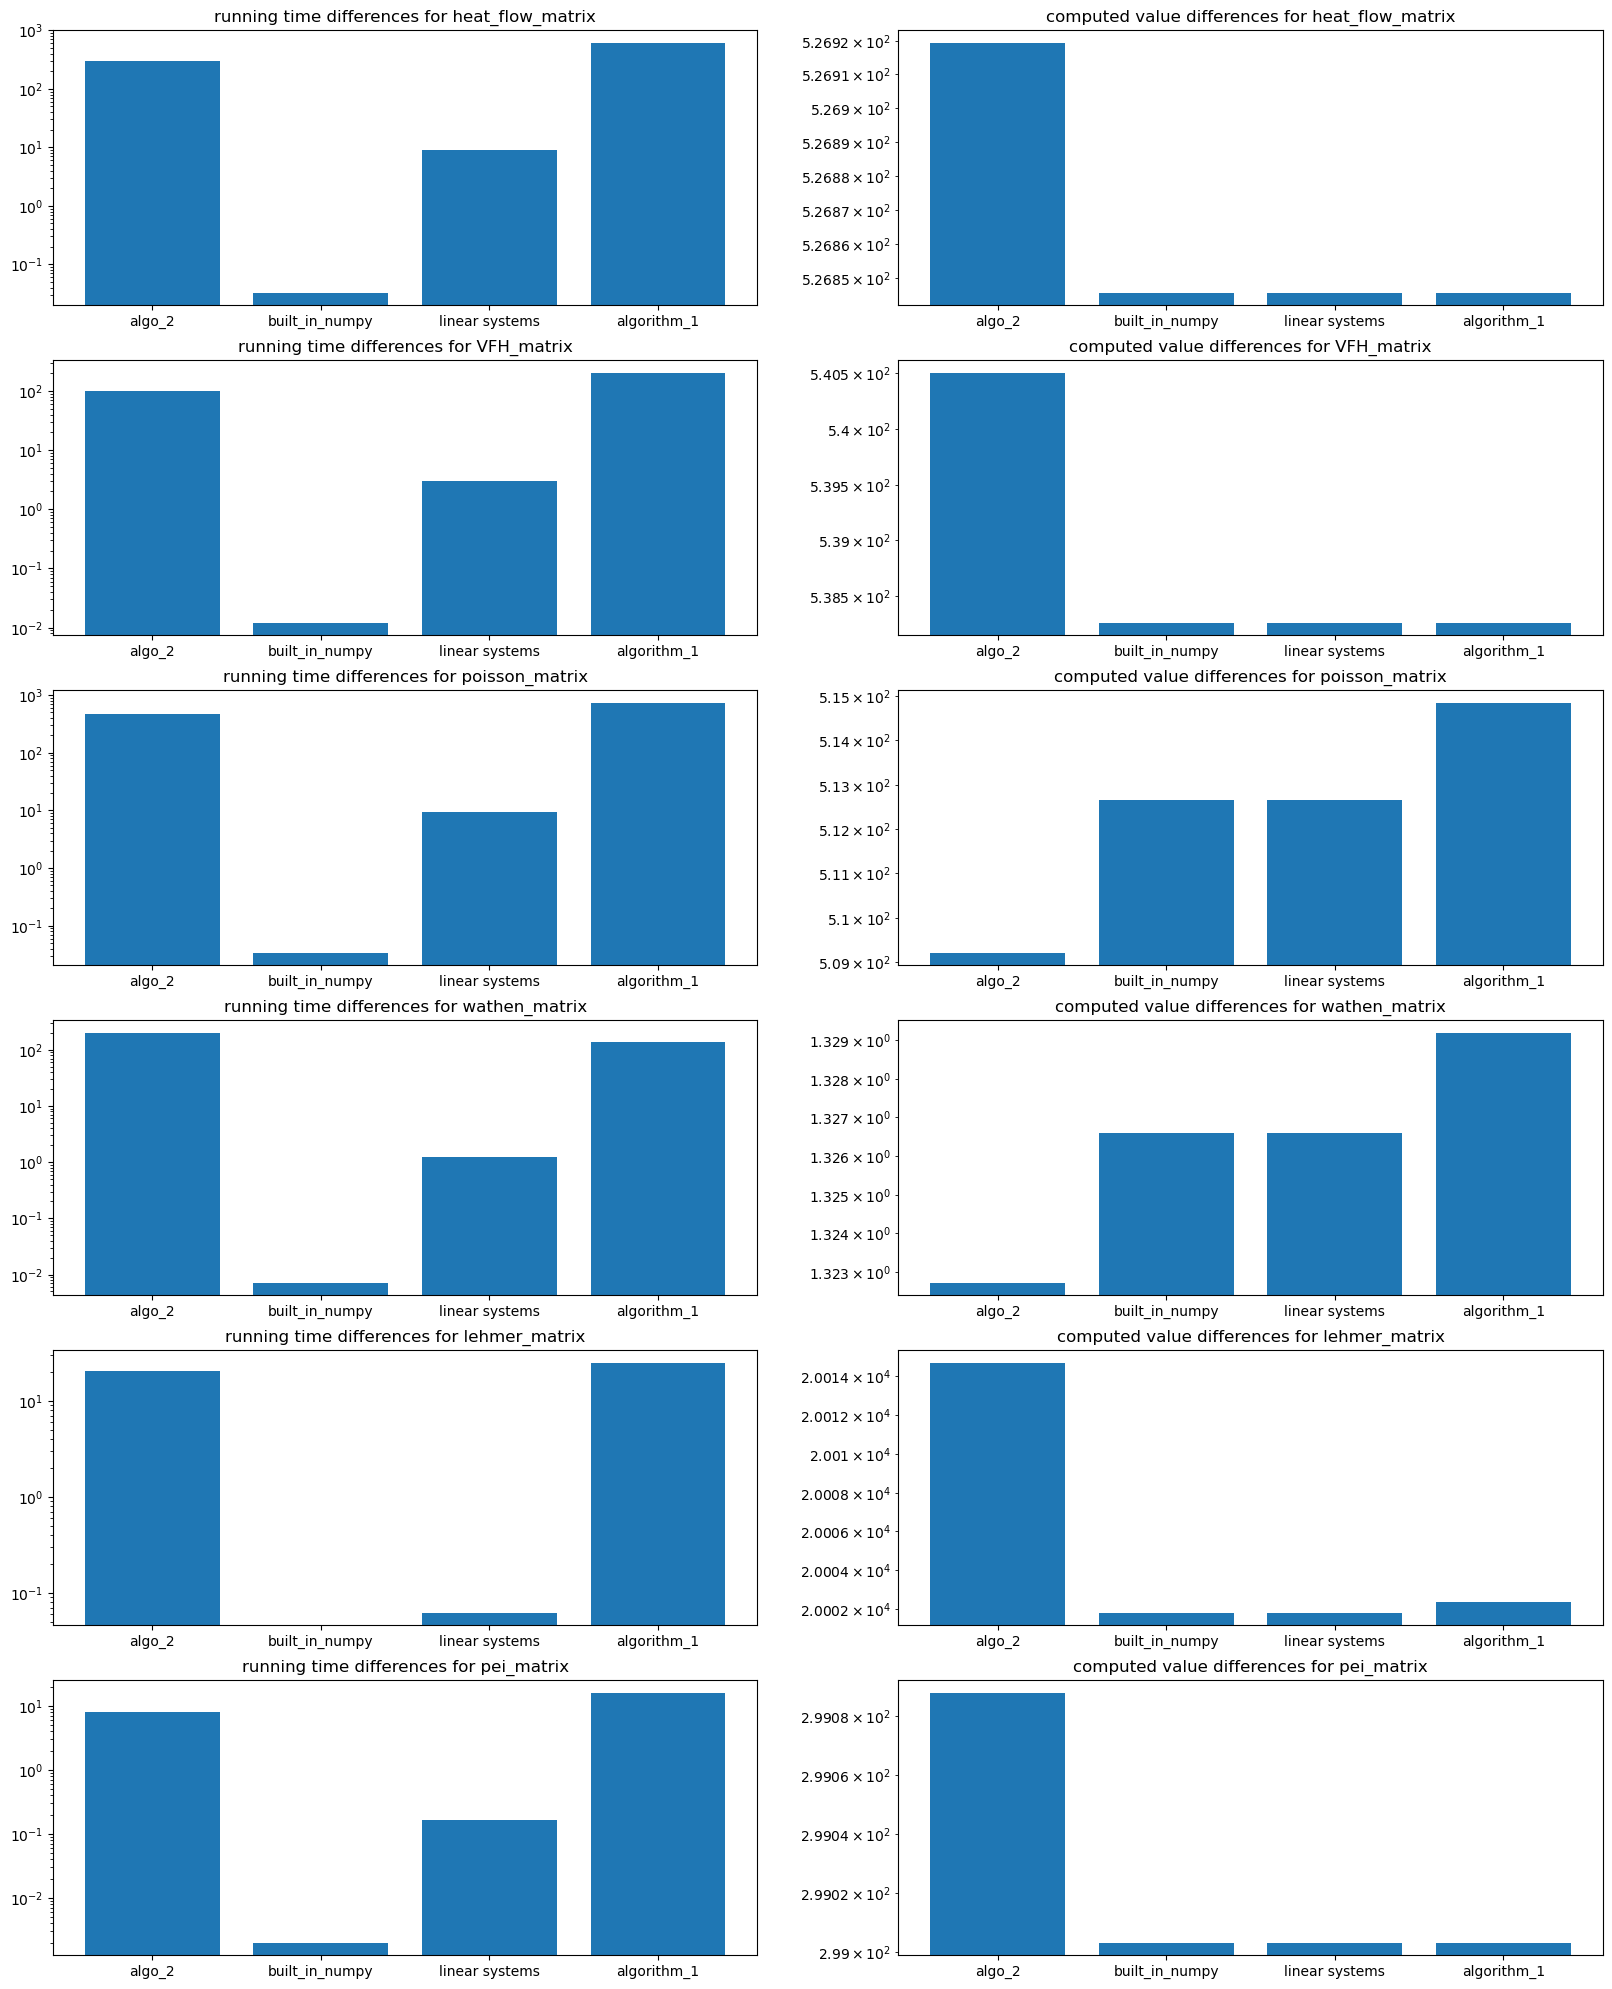

In [4]:
#matrix_array=[heat_flow_matrix, VFH_matrix, poisson_matrix, wathen_matrix, lehmer_matrix, pei_matrix]
matrix_names=['heat_flow_matrix', 'VFH_matrix', 'poisson_matrix', 'wathen_matrix', 'lehmer_matrix', 'pei_matrix']

running_time_array, computed_value_array=get_pickle_file(1e-8)

L=len(running_time_array)

fig, axs=plt.subplots(L,2, figsize= (20,25), sharey = False, sharex = False) #unfortunately, can't do sharex and share y as 
#the scale of the computed values fuck everything up also I don't think it would be very relevant to compare the 
#execution time matrice wise as they all are different, have different size etc...


for j in range(L):
    axs[j][0].bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], running_time_array[j])
    #we'll see if we keep the plotting in logscale
    axs[j][0].set_yscale('log')
    axs[j][0].set_title('running time differences for '+ matrix_names[j], fontsize=12)
    
    axs[j][1].bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], computed_value_array[j])
    #we'll see if we keep the plotting in logscale
    axs[j][1].set_yscale('log')
    axs[j][1].set_title('computed value differences for '+ matrix_names[j], fontsize=12)

### For tolerance=1e-5

no_exist
running it for [[ 1.8 -0.2  0.  ...  0.   0.   0. ]
 [-0.2  1.8 -0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  1.8 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.8 -0.2  0. ]
 [ 0.   0.   0.  ... -0.2  1.8 -0.2]
 [ 0.   0.   0.  ...  0.  -0.2  1.8]]
running it for [[ 4. -1. -1. ... -0. -0. -0.]
 [-1.  2. -0. ... -0. -0. -0.]
 [-1. -0.  2. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  2. -0. -0.]
 [-0. -0. -0. ... -0.  2. -0.]
 [-0. -0. -0. ... -0. -0.  2.]]
running it for [[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]
running it for [[  58.37995788  -58.37995788   19.45998596 ...    0.
     0.            0.        ]
 [ -58.37995788  311.35977535  -58.37995788 ...    0.
     0.            0.        ]
 [  19.45998596  -58.37995788  194.39988944 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  472.370122

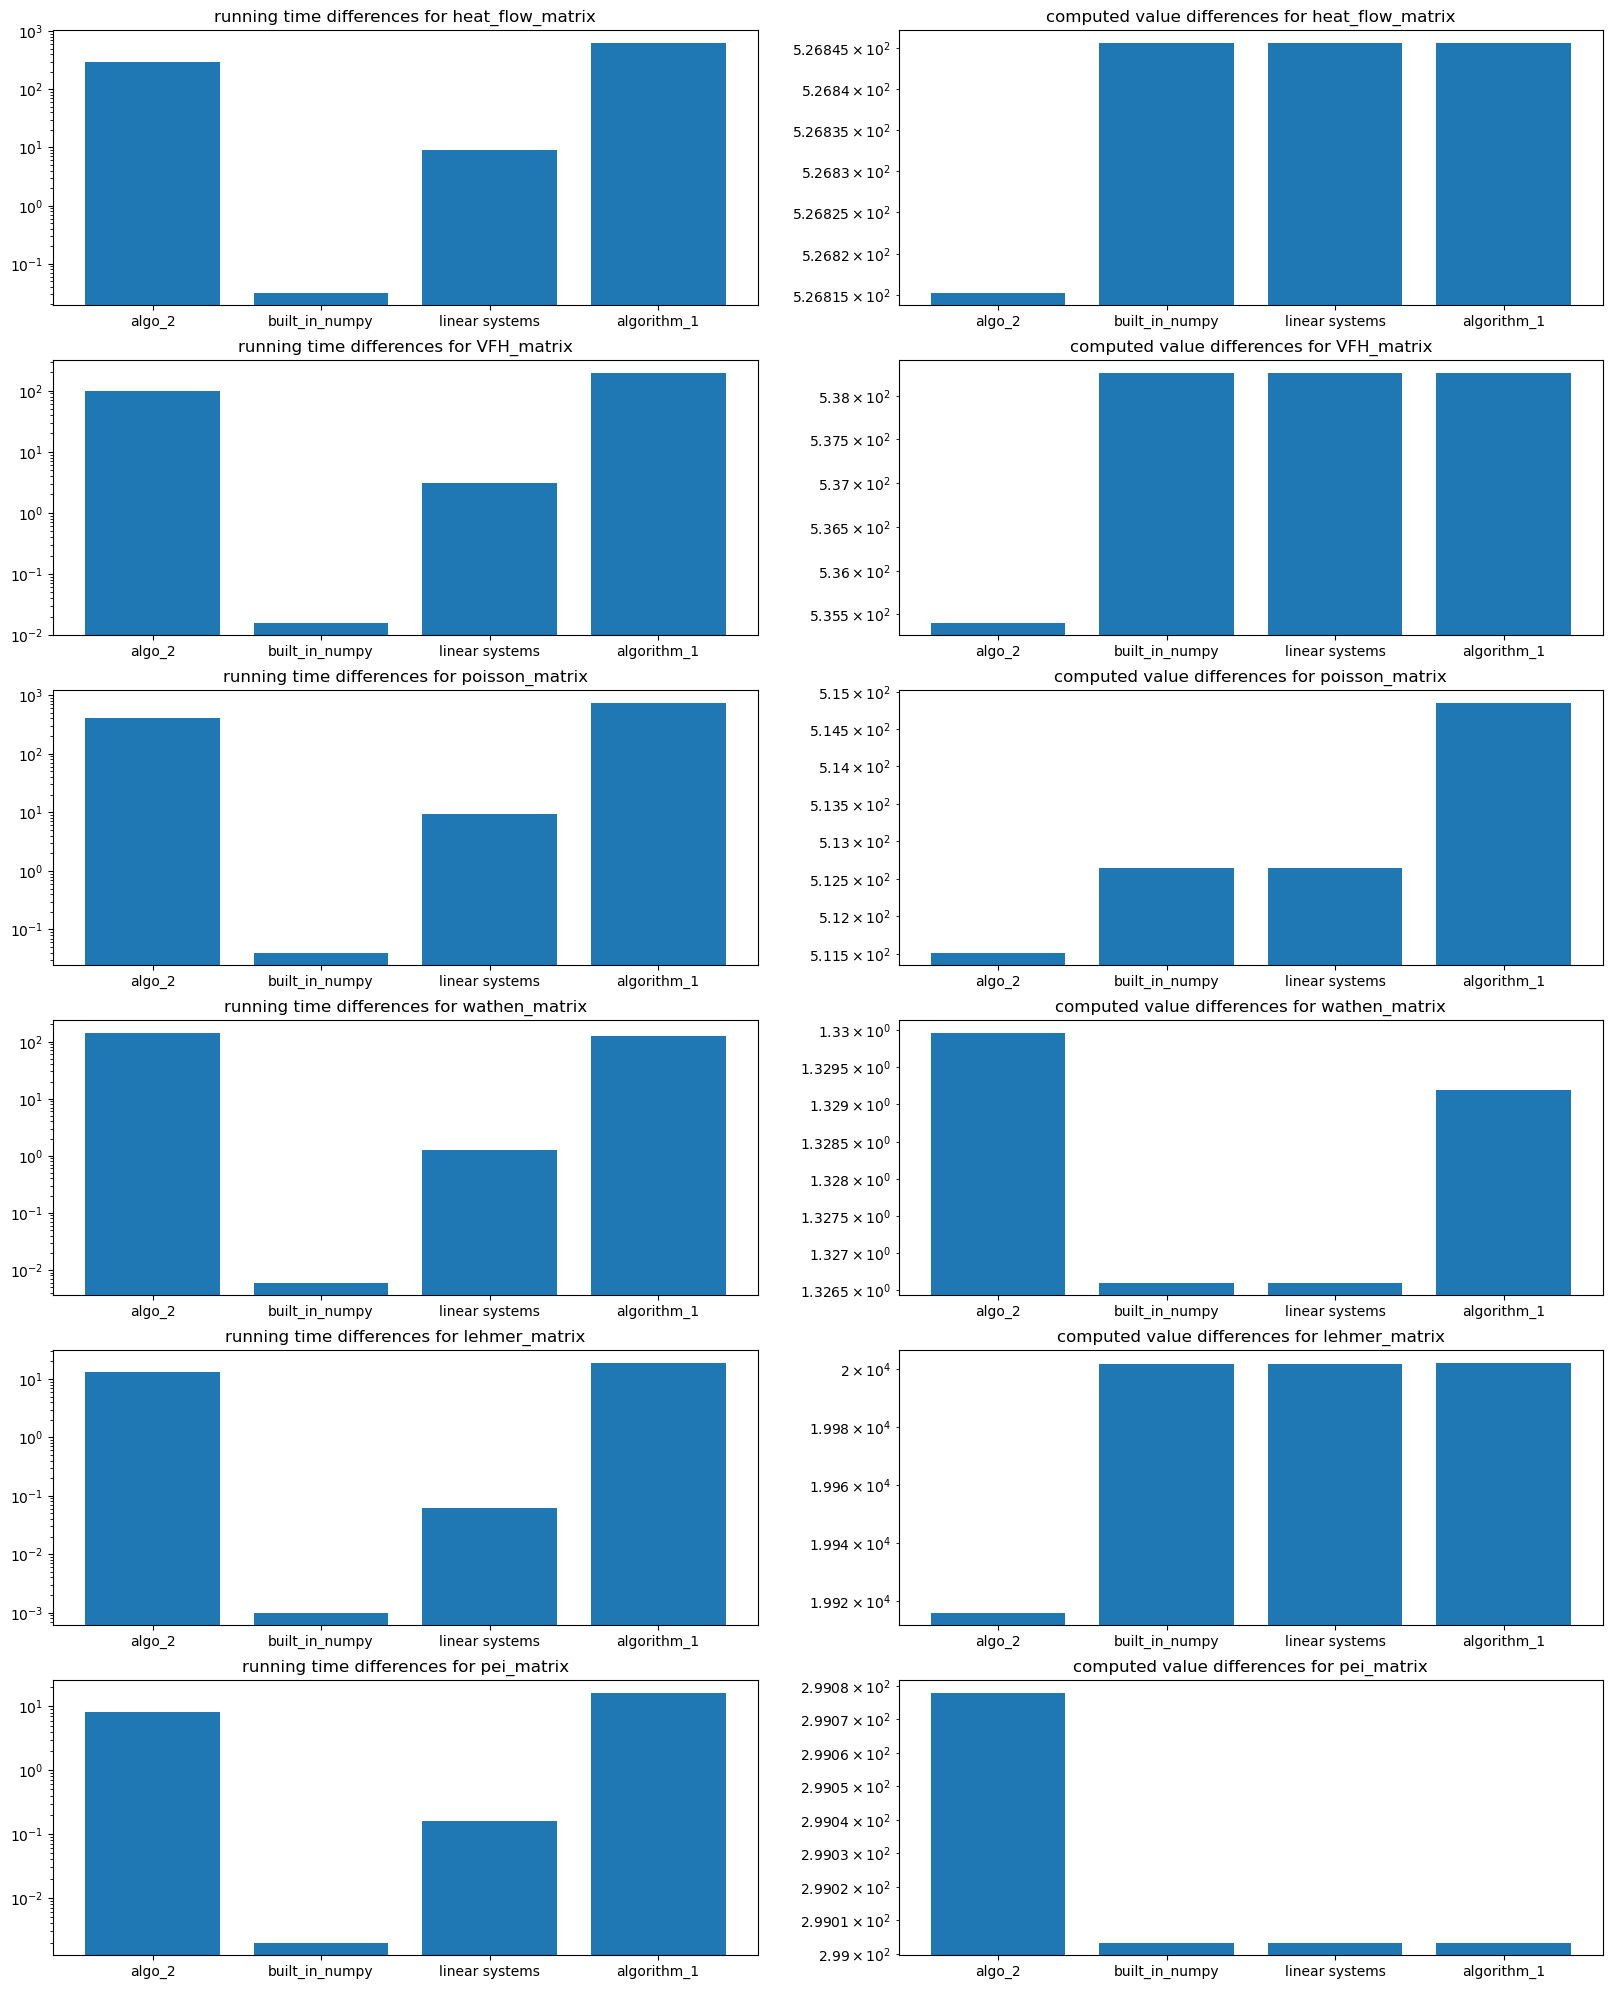

In [5]:
matrix_names=['heat_flow_matrix', 'VFH_matrix', 'poisson_matrix', 'wathen_matrix', 'lehmer_matrix', 'pei_matrix']

running_time_array, computed_value_array=get_pickle_file(1e-5)

L=len(running_time_array)

fig, axs=plt.subplots(L,2, figsize= (20,25), sharey = False, sharex = False) #unfortunately, can't do sharex and share y as 
#the scale of the computed values fuck everything up also I don't think it would be very relevant to compare the 
#execution time matrice wise as they all are different, have different size etc...


for j in range(L):
    axs[j][0].bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], running_time_array[j])
    #we'll see if we keep the plotting in logscale
    axs[j][0].set_yscale('log')
    axs[j][0].set_title('running time differences for '+ matrix_names[j], fontsize=12)
    
    axs[j][1].bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], computed_value_array[j])
    #we'll see if we keep the plotting in logscale
    axs[j][1].set_yscale('log')
    axs[j][1].set_title('computed value differences for '+ matrix_names[j], fontsize=12)

### For tolerance=1e-1

no_exist
running it for [[ 1.8 -0.2  0.  ...  0.   0.   0. ]
 [-0.2  1.8 -0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  1.8 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.8 -0.2  0. ]
 [ 0.   0.   0.  ... -0.2  1.8 -0.2]
 [ 0.   0.   0.  ...  0.  -0.2  1.8]]
running it for [[ 4. -1. -1. ... -0. -0. -0.]
 [-1.  2. -0. ... -0. -0. -0.]
 [-1. -0.  2. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  2. -0. -0.]
 [-0. -0. -0. ... -0.  2. -0.]
 [-0. -0. -0. ... -0. -0.  2.]]
running it for [[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]
running it for [[  58.37995788  -58.37995788   19.45998596 ...    0.
     0.            0.        ]
 [ -58.37995788  311.35977535  -58.37995788 ...    0.
     0.            0.        ]
 [  19.45998596  -58.37995788  194.39988944 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  472.370122

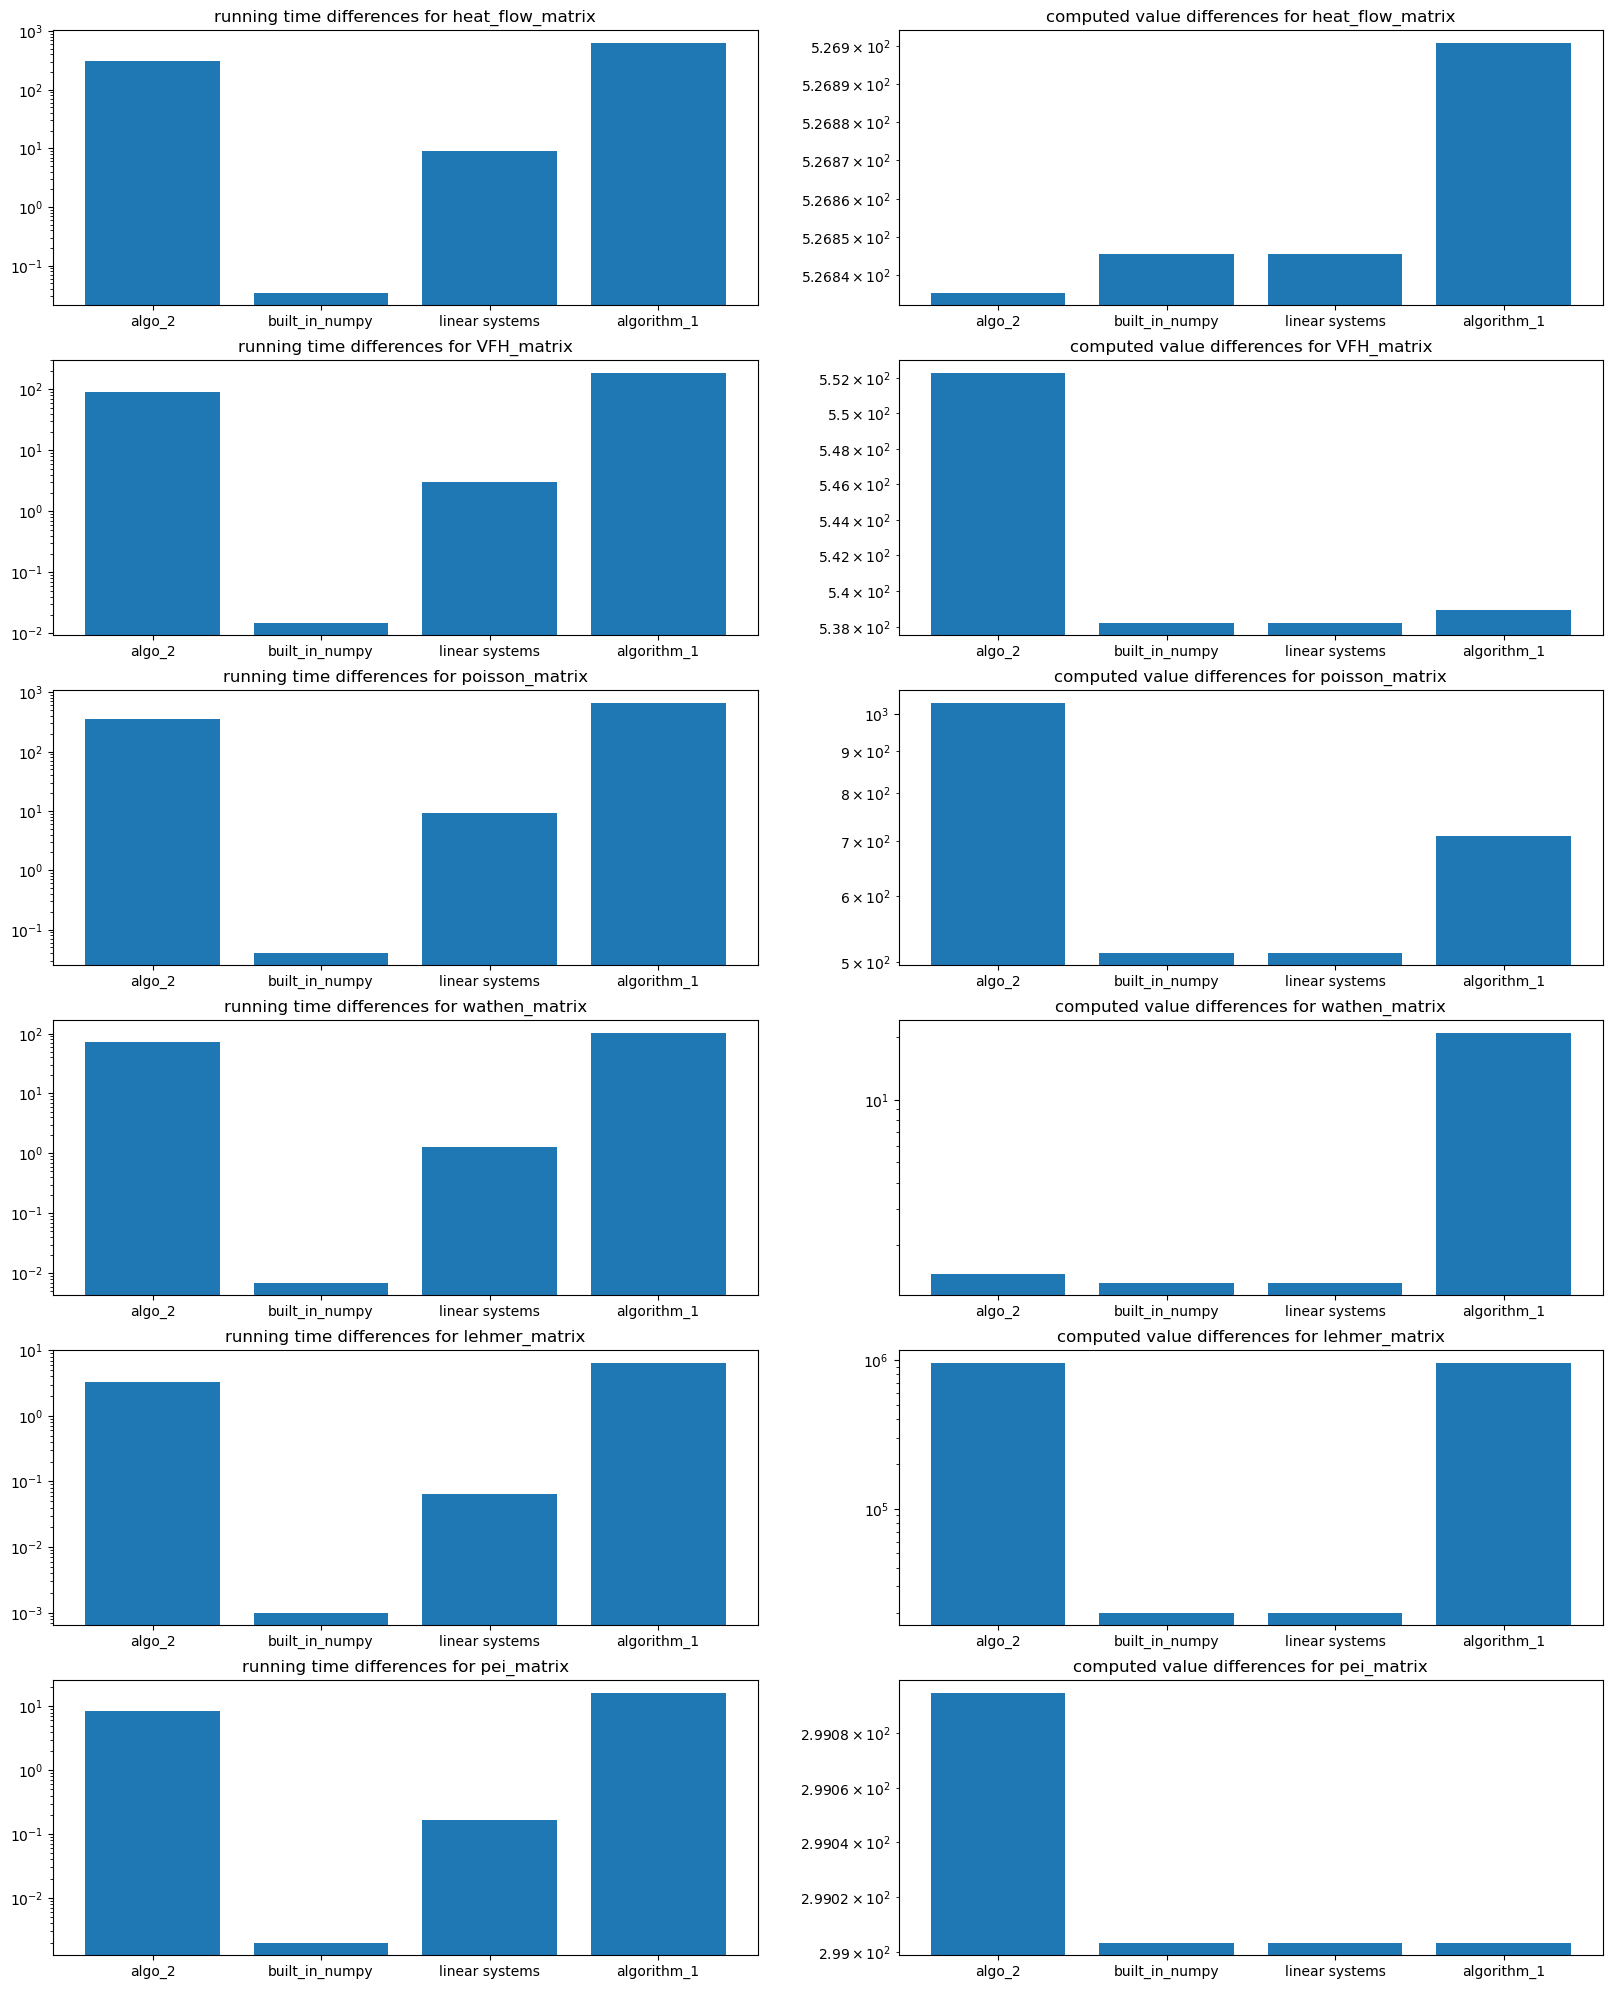

In [6]:
matrix_names=['heat_flow_matrix', 'VFH_matrix', 'poisson_matrix', 'wathen_matrix', 'lehmer_matrix', 'pei_matrix']

running_time_array, computed_value_array=get_pickle_file(1e-1)

L=len(running_time_array)

fig, axs=plt.subplots(L,2, figsize= (20,25), sharey = False, sharex = False) #unfortunately, can't do sharex and share y as 
#the scale of the computed values fuck everything up also I don't think it would be very relevant to compare the 
#execution time matrice wise as they all are different, have different size etc...


for j in range(L):
    axs[j][0].bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], running_time_array[j])
    #we'll see if we keep the plotting in logscale
    axs[j][0].set_yscale('log')
    axs[j][0].set_title('running time differences for '+ matrix_names[j], fontsize=12)
    
    axs[j][1].bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], computed_value_array[j])
    #we'll see if we keep the plotting in logscale
    axs[j][1].set_yscale('log')
    axs[j][1].set_title('computed value differences for '+ matrix_names[j], fontsize=12)